# Passo 3 - prática 1

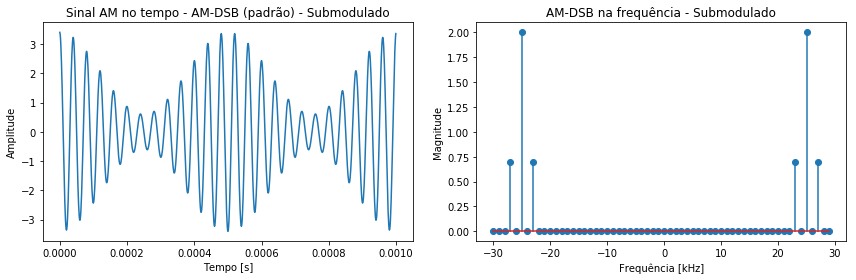

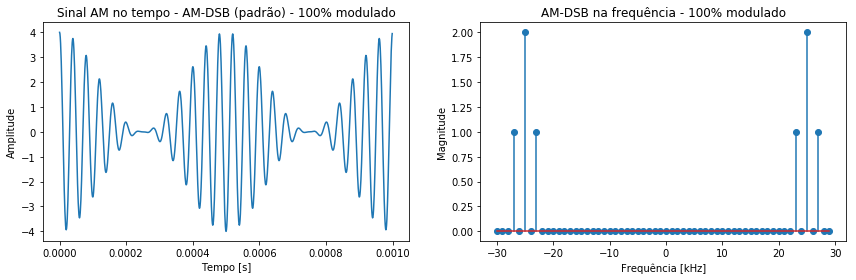

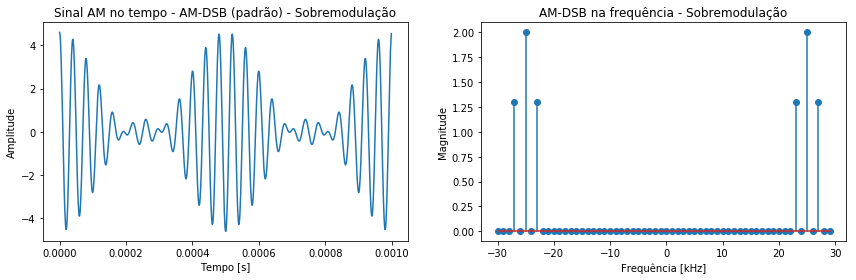

In [12]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu = 0.7                                                       # Índice de modulação
fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000
Ts = 1e-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
t = np.arange(N)*Ts
s = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f = 2.0*np.abs((fftpack.fft(s)))/N                           # Cálculo da FFT
Ns = len(s)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência

# A fft em 30 pontos (para melhor visualização)
S_f_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f_new[i] = S_f[kk]
    else :
        S_f_new[i] = S_f[Ns+kk]

# Gráfico do AM-DSB submodulada no tempo
plt.figure(1,[12,4])
plt.subplot(121)
plt.plot(t,s)
plt.title("Sinal AM no tempo - AM-DSB (padrão) - Submodulado")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

# Gráfico do AM-DSB na frequência
plt.subplot(122)
plt.title("AM-DSB na frequência - Submodulado")
plt.xlabel("Frequência [kHz]")
plt.ylabel("Magnitude")
plt.stem(freq/1e3,S_f_new)
plt.tight_layout()
plt.show()

#100%
Mu = 1
s2 = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f2 = 2.0*np.abs((fftpack.fft(s2)))/N                           # Cálculo da FFT
Ns = len(s2)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência

# A fft em 30 pontos (para melhor visualização)
S_f2_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f2_new[i] = S_f2[kk]
    else :
        S_f2_new[i] = S_f2[Ns+kk]

# Gráfico do AM-DSB no tempo
plt.figure(2,[12,4])
plt.subplot(121)
plt.plot(t,s2)
plt.title("Sinal AM no tempo - AM-DSB (padrão) - 100% modulado")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

# Gráfico do AM-DSB na frequência
plt.subplot(122)
plt.title("AM-DSB na frequência - 100% modulado")
plt.xlabel("Frequência [kHz]")
plt.ylabel("Magnitude")
plt.stem(freq/1e3,S_f2_new)
plt.tight_layout()
plt.show()

#sobremodulação
Mu = 1.3
s3 = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f3 = 2.0*np.abs((fftpack.fft(s3)))/N                           # Cálculo da FFT
Ns = len(s3)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência

# A fft em 30 pontos (para melhor visualização)
S_f3_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f3_new[i] = S_f3[kk]
    else :
        S_f3_new[i] = S_f3[Ns+kk]

# Gráfico do AM-DSB no tempo
plt.figure(3,[12,4])
plt.subplot(121)
plt.plot(t,s3)
plt.title("Sinal AM no tempo - AM-DSB (padrão) - Sobremodulação")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

# Gráfico do AM-DSB na frequência
plt.subplot(122)
plt.title("AM-DSB na frequência - Sobremodulação")
plt.xlabel("Frequência [kHz]")
plt.ylabel("Magnitude")
plt.stem(freq/1e3,S_f3_new)
plt.tight_layout()
plt.show()

Submodulação tem um indice de modulação menor do que 1, é o caso mais buscado. 100% modulado tem indice de modulação igual a 1, é o caso ideal, mas impraticavel devido não existir filtro ideal. Já sobremodulado, tem indice de modulação maior do que 1, este é o pior caso, já que se perde informação devido a sobrepossição em algumas partes do sinal. 

# Passo 3 - prática 4

In [3]:
import numpy as np
import scipy.signal as sci
from scipy import fftpack

# Parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu = 1.0                                                      # Índice de modulação
fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000
Ts = 1e-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
t = np.arange(N)*Ts
s = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f = 2.0*np.abs((fftpack.fft(s)))/N                           # Cálculo da FFT
Ns = len(s)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência

S_f_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f_new[i] = S_f[kk]
    else :
        S_f_new[i] = S_f[Ns+kk]

Nfft = 1000
Xfft=np.fft.fft(s,Nfft)              # Encontra a FFT
Xfft = np.array_split(Xfft,2)[0]
f=np.arange(0,0.5*fsampling,fsampling/Nfft)        # Eixo da frequência


Ptem=(np.linalg.norm(s)**2)/N   #Potência no tempo
print('Potência via amostras no tempo =',Ptem)

Pteo=(Ac**2/2) + (Ac**2*(Mu)**2/8) + (Ac**2*(Mu)**2/8) #Potência teórica 
print('Potência Teórica =',Pteo)

Potência via amostras no tempo = 3.0
Potência Teórica = 3.0


# Passo 3 - prática 2

In [73]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

Ts=1e-6                                                         # Definição do período
t = np.arange(1000)*Ts                                          # Definição do vetor tempo
fc = 10000                                                      # Frequência da portadora.
fm = 1500                                                       # Frequência do sinal
Mu = 0.6                                                        # Índice de modulaçao.
Ac = 1.0
x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1
#Tau = 10^-4
tau = ([1e-4, 2e-4, 4e-3])  # Constante de tempo do detector de envelop
for j in range(0,3):
    erro=0*x_env
    for i in range(Ns):
        inp = x_AM[i]
        if inp>=out:
            out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
        else:
            out *= (1-Ts/tau[j])    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
        x_env[i] = out
        erro[i]=((x_env[i]-x_envIdeal[i])**2)/len(x_envIdeal)
    
    emq=sum(erro)
    print("Erro medio quadratico para tau =",tau[j],"é:",emq)



Erro medio quadratico para tau = 0.0001 é: 0.126750715881
Erro medio quadratico para tau = 0.0002 é: 0.0536946487174
Erro medio quadratico para tau = 0.004 é: 0.410199065112


A escolha do valor de $\tau$ é de fundamental importância no detector de envoltória. Se o valor de $\tau$ for
muito menor que o período da portadora $1/f_c$, o capacitor se descarregará muito rápido quando a
portadora cai abaixo do seu valor de pico, o que fará com que a saída do detector não siga a envoltória
desta onda. Se, por outro lado, o valor de $\tau$ for muito maior que a máxima variação $W$
do sinal modulador, então o capacitor se descarregará muito lentamente e a saída do detector não seguirá
a envoltória da onda AM. Logo, pelos calculos dos erros, notamos que para $\tau = 2 \cdot 10^{-4}$, foi quando tivemos o menor erro. 

# Passo 3 - Prática 8

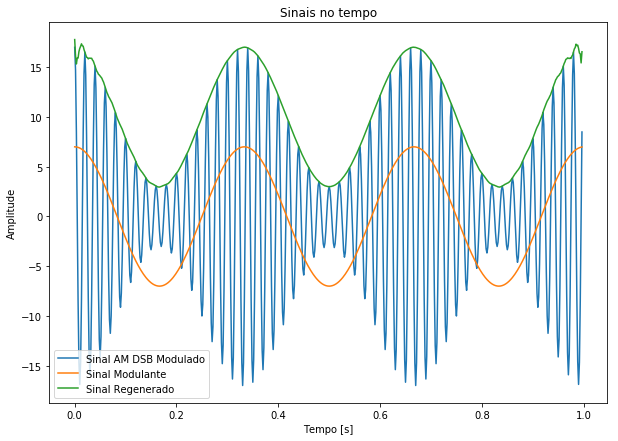

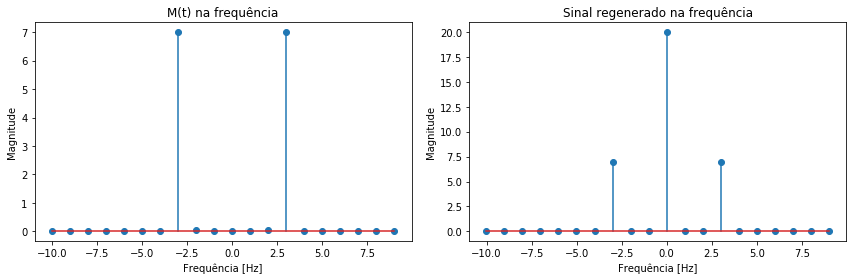

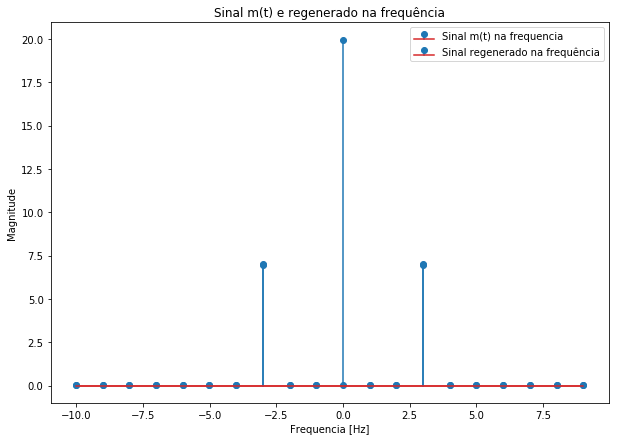

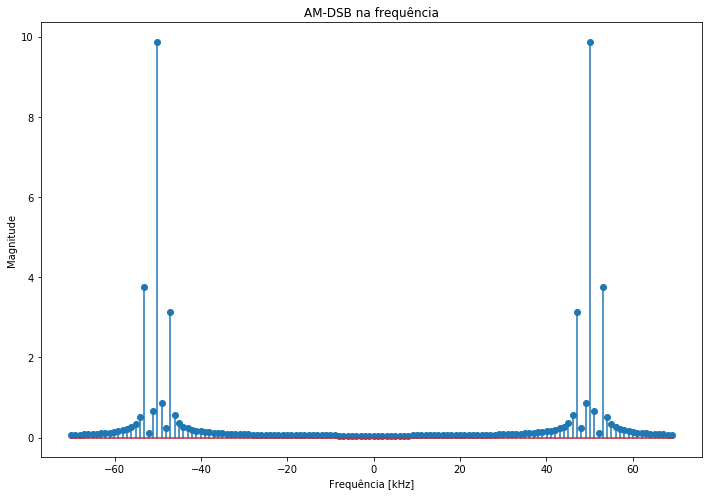

In [27]:
# Parâmetros da onda
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt
from scipy import fftpack

# Sinais
fc = 50;                                                 #Frequencia portadora
fm = 3;                                                  # Frequência do sinal
Am = 7;                                                   # Amplitude do sinal 
Ac=10;                                                   #Amplitude portadora

Fs = 600;                                                # Frequência de amostragem
Ts=1/Fs;
t =  np.arange(0,1-1/Fs,1/Fs)                             # Eixo do tempo
Mu=0.7;
m_t=Am*np.cos(2*np.pi*fm*t)                             #Sinal Modulante
s = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t) # Sinal em banda base

# Hilbert
z= hilbert(s)                                             # Sinal analítico (real + imaginário)
demodulated=(z.real**2+z.imag**2)**(0.5)


#Plot

plt.figure(1,[10,7])
plt.title("Sinais no tempo")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
AM_modulado=plt.plot(t,s)
Sinal_modulante=plt.plot(t,m_t)
Sinal_regenerado=plt.plot(t,demodulated)
plt.legend(["Sinal AM DSB Modulado","Sinal Modulante","Sinal Regenerado"])
plt.show()


#Espectro

# Cálculo da FFT de M_t
lfft = 10                                                     # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
M_f = 2.0*np.abs((fftpack.fft(m_t)))/len(t)                           # Cálculo da FFT
Ns = len(m_t)                                                    # Comprimento do sinal modulante
Nk = len(k)                                                    # Comprimento do sinal em frequência

M_f_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        M_f_new[i] = M_f[kk]
    else :
        M_f_new[i] = M_f[Ns+kk]
        
# Cálculo da FFT do regenerado
lfft = 10                                                     # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
D_f = 2.0*np.abs((fftpack.fft(demodulated)))/len(t)                           # Cálculo da FFT
Ns = len(demodulated)                                                    # Comprimento do sinal modulante
Nk = len(k)                                                    # Comprimento do sinal em frequência

D_f_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        D_f_new[i] = D_f[kk]
    else :
        D_f_new[i] = D_f[Ns+kk]
        
             
        
# Gráfico do M_t e regenerado na frequência
plt.figure(2,[12,4])
plt.subplot(121)
plt.title("M(t) na frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Magnitude")
plt.stem(freq,M_f_new)
plt.tight_layout()

plt.subplot(122)
plt.title("Sinal regenerado na frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Magnitude")
plt.stem(freq,D_f_new)
plt.tight_layout()
plt.show()

plt.figure(3,[10,7])
plt.title("Sinal m(t) e regenerado na frequência")
plt.xlabel("Frequencia [Hz]")
plt.ylabel("Magnitude")
plt.stem(freq,M_f_new)
plt.stem(freq,D_f_new)
plt.legend(["Sinal m(t) na frequencia","Sinal regenerado na frequência"])
plt.show()


# Cálculo da FFT de AM-DSB
lfft = 70                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f = 2.0*np.abs((fftpack.fft(s)))/len(t)                           # Cálculo da FFT
Ns = len(s)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência

# A fft em 30 pontos (para melhor visualização)
S_f_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f_new[i] = S_f[kk]
    else :
        S_f_new[i] = S_f[Ns+kk]

# Gráfico do AM-DSB no tempo
plt.figure(4,[10,7])
plt.title("AM-DSB na frequência")
plt.xlabel("Frequência [kHz]")
plt.ylabel("Magnitude")
plt.stem(freq,S_f_new)
plt.tight_layout()
plt.show()




